In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the CSV file into a Pandas DataFrame with the correct delimiter
data = pd.read_csv('/Users/student/Desktop/Case Study/CSV File for Home Workout - Form Yanıtları 1.csv', delimiter=',')

# Print the column names to verify correctness
print(data.columns)

Index(['Age Range', 'Gender', 'Level of Education',
       'Approximate Annual Income Range in Euros (€)', 'Residence',
       'Approximate Distance to the Nearest Gym', '1st Important Factor',
       '2nd Important Factor', '3rd Important Factor', '4th Important Factor',
       '5th Important Factor', 'Frequency of Workouts at Home',
       'Equipments Owned\n', 'Main Challenges', 'Solutions Found',
       'Transitioning to a Gym',
       'Factors That Influenced transitioning to a gym', 'Seeked Supports'],
      dtype='object')


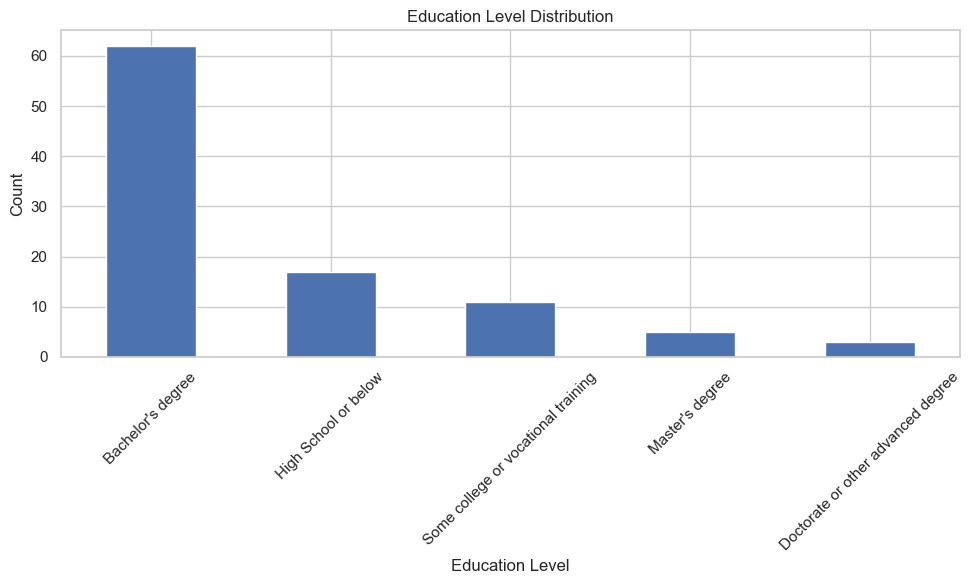

In [81]:
# Plot a bar chart for the "Level of Education" column
education_counts = data['Level of Education'].value_counts()
education_counts.plot(kind='bar', figsize=(10, 6))
plt.title('Education Level Distribution')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

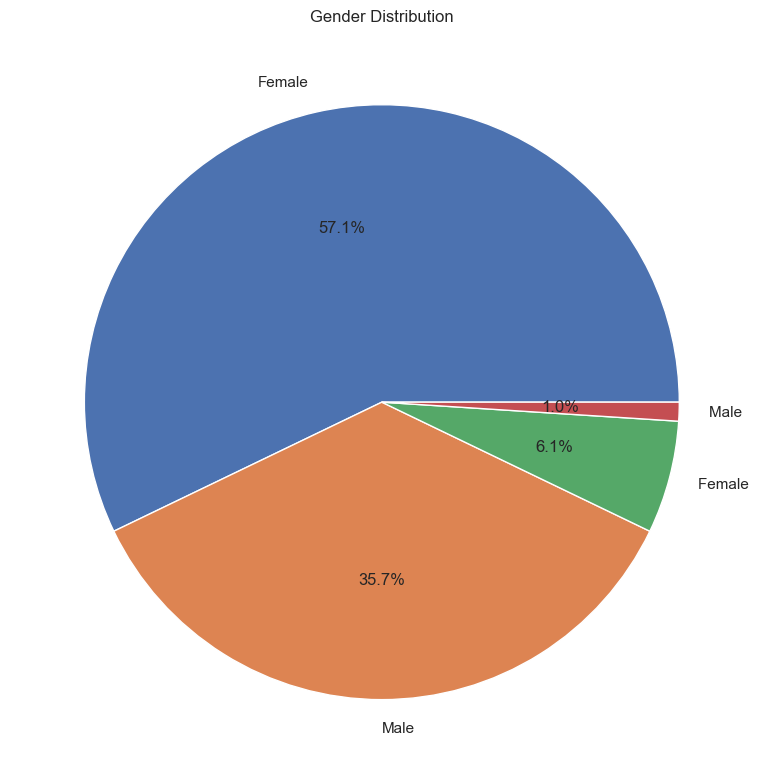

In [82]:

# Plot a pie chart for the "Gender" column
gender_counts = data['Gender'].value_counts()
gender_counts.plot(kind='pie', autopct='%1.1f%%', figsize=(8, 8))
plt.title('Gender Distribution')
plt.ylabel('')
plt.tight_layout()
plt.show()


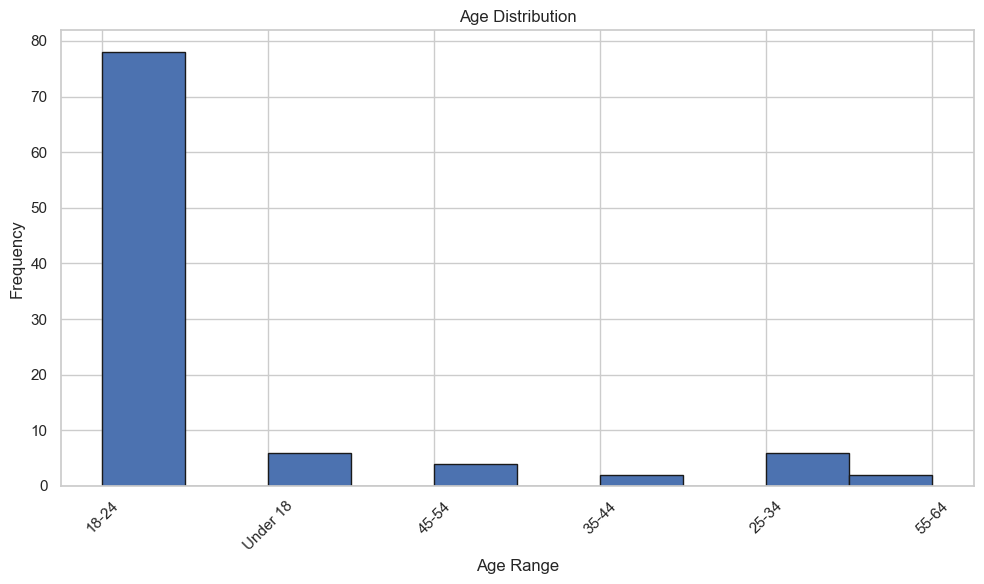

In [91]:
# Histogram for Age
plt.figure(figsize=(10, 6))
plt.hist(data['Age Range'], bins=10, edgecolor='k')
plt.title('Age Distribution')
plt.xlabel('Age Range')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

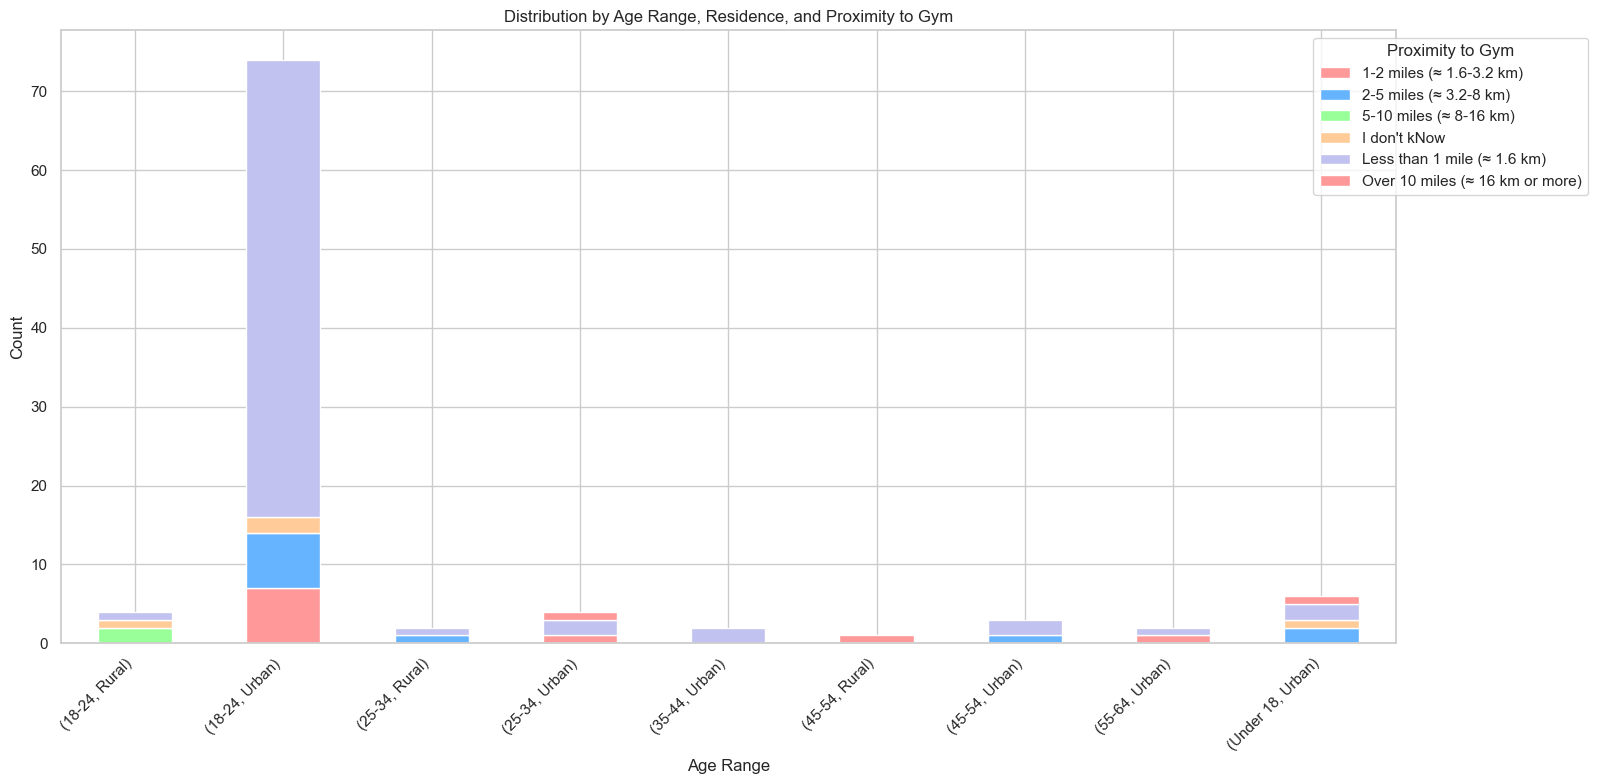

In [84]:
# Group the data by 'Age Range', 'Residence', and 'Approximate Distance to the Nearest Gym'
# and count the occurrences
grouped_data = data.groupby(['Age Range', 'Residence', 'Approximate Distance to the Nearest Gym'])['Age Range'].count().unstack().fillna(0)

# Create a stacked bar chart
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0']
ax = grouped_data.plot(kind='bar', stacked=True, color=colors, figsize=(16, 8))

plt.title('Distribution by Age Range, Residence, and Proximity to Gym')
plt.xlabel('Age Range')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')

# Add a legend
ax.legend(title='Proximity to Gym', loc='upper right', bbox_to_anchor=(1.15, 1))

plt.tight_layout()
plt.show()

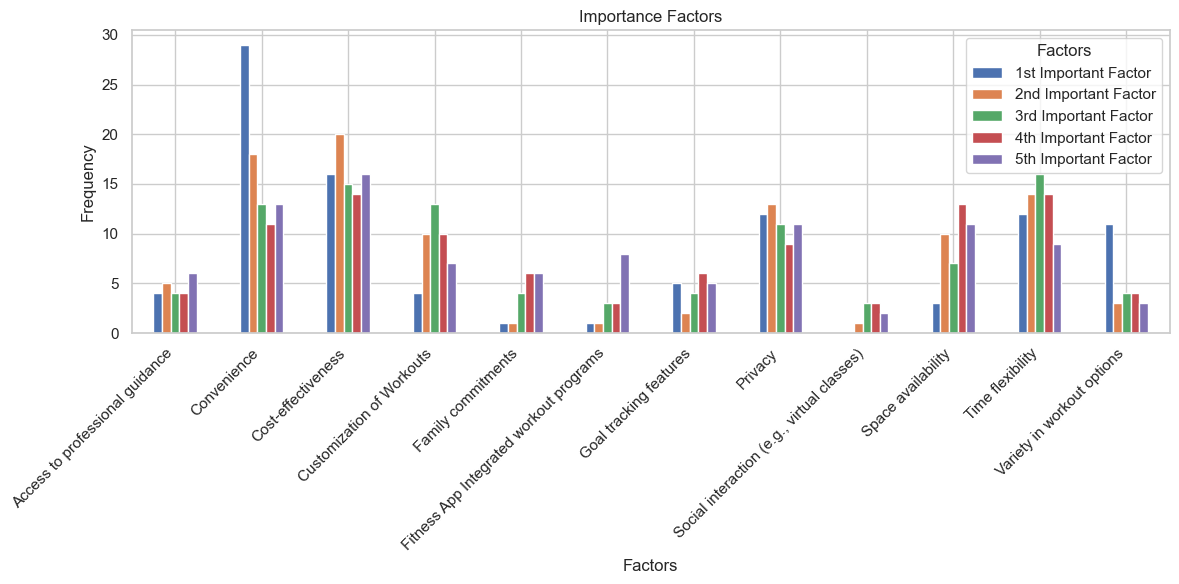

In [85]:
# Extract the columns for importance factors
factors = data[['1st Important Factor', '2nd Important Factor', '3rd Important Factor', '4th Important Factor', '5th Important Factor']]

# Count the frequency of each factor
factor_counts = factors.apply(pd.Series.value_counts)

# Create a bar chart
factor_counts.plot(kind='bar', figsize=(12, 6))
plt.title('Importance Factors')
plt.xlabel('Factors')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Factors')
plt.tight_layout()
plt.show()


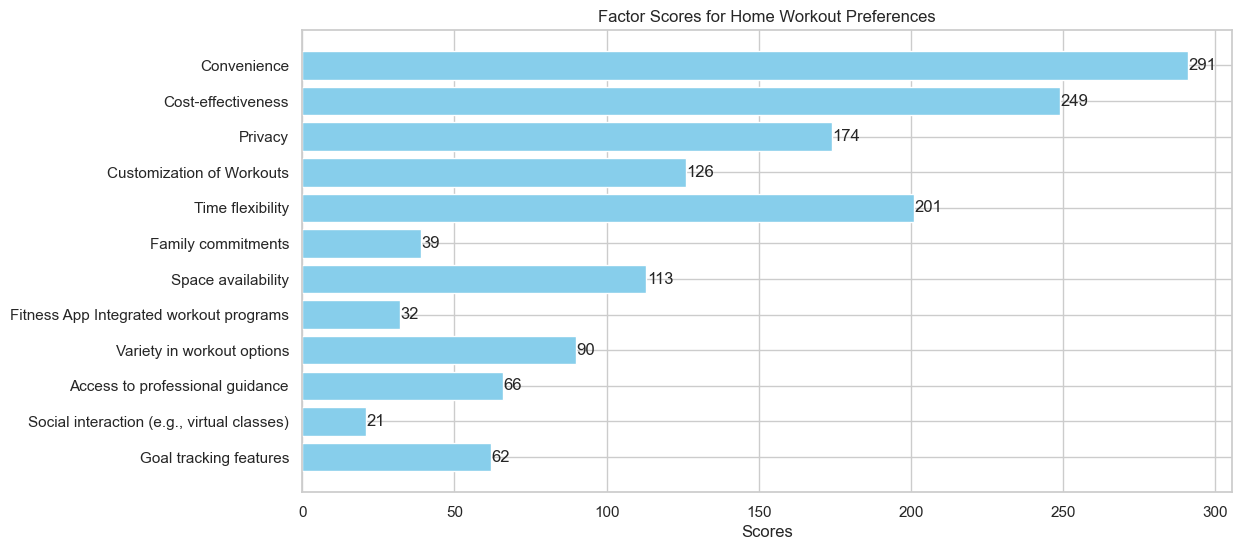

In [86]:
# Create a dictionary to store the scores for each factor
factor_scores = {
    "Convenience": 0,
    "Cost-effectiveness": 0,
    "Privacy": 0,
    "Customization of Workouts": 0,
    "Time flexibility": 0,
    "Family commitments": 0,
    "Space availability": 0,
    "Fitness App Integrated workout programs": 0,
    "Variety in workout options": 0,
    "Access to professional guidance": 0,
    "Social interaction (e.g., virtual classes)": 0,
    "Goal tracking features": 0,
}

# Define a list of column names for each section
sections = ["1st Important Factor", "2nd Important Factor", "3rd Important Factor", "4th Important Factor", "5th Important Factor"]

# Iterate through each section
for col_name in sections:
    col_index = int(col_name[0])  # Extract the index (1, 2, 3, 4, 5)
    
    # Loop through each factor in the current section
    for factor in data[col_name]:
        # Check if the factor is in the dictionary
        if factor in factor_scores:
            # Increment the score based on the column index
            factor_scores[factor] += 6 - col_index  # 5, 4, 3, 2, or 1

# Extract factor names and scores for plotting
factors = list(factor_scores.keys())
scores = list(factor_scores.values())

# Create a bar chart
plt.figure(figsize=(12, 6))
plt.barh(factors, scores, color='skyblue')
plt.xlabel('Scores')
plt.title('Factor Scores for Home Workout Preferences')
plt.gca().invert_yaxis()  # Invert the y-axis for better readability

# Annotate the bars with the scores
for i, score in enumerate(scores):
    plt.text(score + 0.2, i, str(score), va='center', fontsize=12)

plt.show()


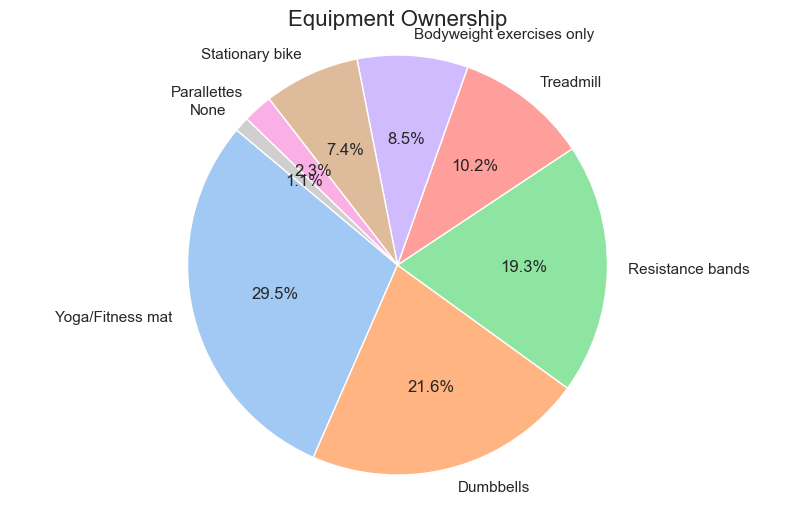

In [87]:
# Initialize an empty dictionary to store the equipment counts
equipment_counts = {
    'Dumbbells': 0,
    'Resistance bands': 0,
    'Yoga/Fitness mat': 0,
    'Treadmill': 0,
    'Stationary bike': 0,
    'Bodyweight exercises only': 0,
    'Parallettes': 0,
    'None': 0
}

# Iterate over the 'Equipments Owned' column and update the counts
for row in data['Equipments Owned\n']:
    if pd.notna(row):  # Check if the cell is not empty
        # Split the values by commas and strip whitespace
        equipment_list = [equipment.strip() for equipment in row.split(',')]

        # Update the counts in the dictionary
        for equipment in equipment_list:
            if equipment in equipment_counts:
                equipment_counts[equipment] += 1

# Convert the dictionary to a DataFrame and sort by count
equipment_df = pd.DataFrame(list(equipment_counts.items()), columns=['Equipment', 'Count'])
equipment_df = equipment_df.sort_values(by='Count', ascending=False)

# Create a color palette for a creative look
colors = sns.color_palette("pastel")[0:len(equipment_df)]

# Create a pie chart
plt.figure(figsize=(10, 6))
plt.pie(equipment_df['Count'], labels=equipment_df['Equipment'], autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Equipment Ownership', fontsize=16)

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')

# Show the plot
plt.show()


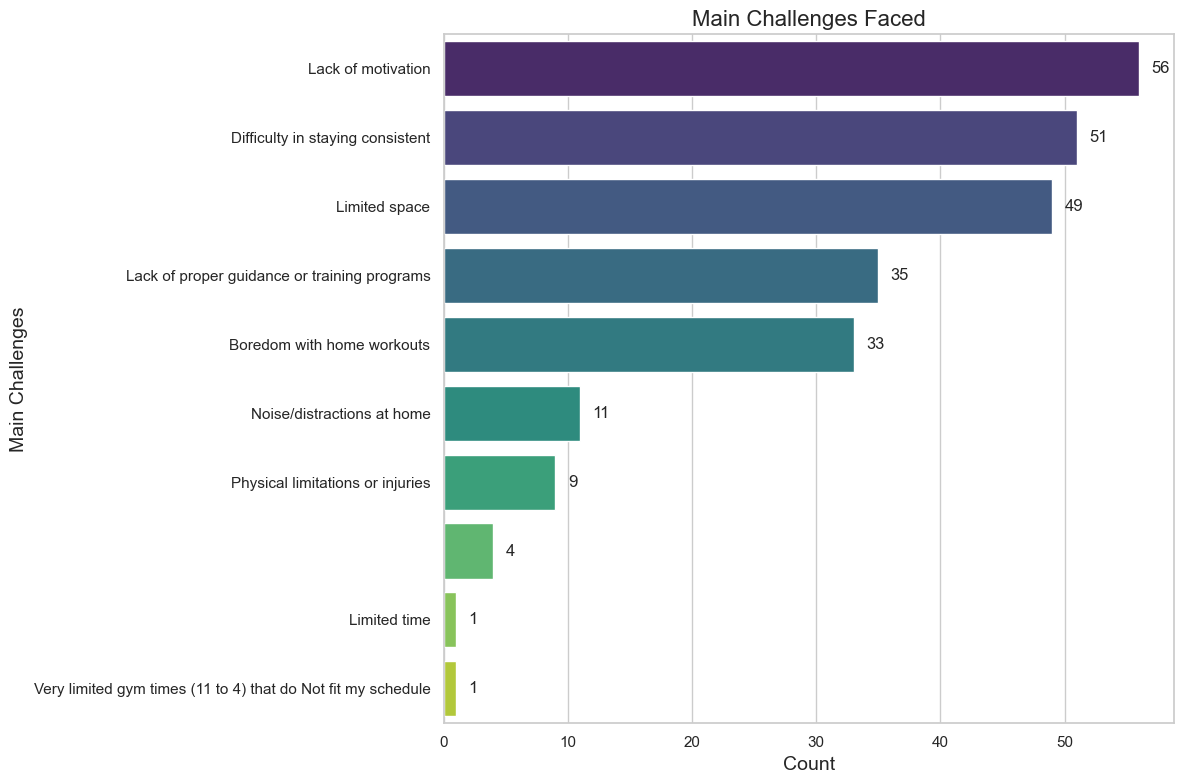

In [88]:
# Initialize an empty dictionary to store the main challenge counts
challenge_counts = {}

# Iterate over the 'Main Challenges' column and update the counts
for row in data['Main Challenges']:
    if pd.notna(row):  # Check if the cell is not empty
        # Split the values by commas and strip whitespace
        challenge_list = [challenge.strip() for challenge in row.split(',')]

        # Update the counts in the dictionary
        for challenge in challenge_list:
            if challenge in challenge_counts:
                challenge_counts[challenge] += 1
            else:
                challenge_counts[challenge] = 1

# Convert the dictionary to a DataFrame
challenge_df = pd.DataFrame(list(challenge_counts.items()), columns=['Challenges', 'Count'])

# Sort the DataFrame by count in descending order for a better visualization
challenge_df = challenge_df.sort_values(by='Count', ascending=False)

# Create a visually appealing bar plot
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")
ax = sns.barplot(x="Count", y="Challenges", data=challenge_df, palette="viridis")
plt.xlabel('Count', fontsize=14)
plt.ylabel('Main Challenges', fontsize=14)
plt.title('Main Challenges Faced', fontsize=16)

# Add counts on top of the bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_width())}', (p.get_width() + 1, p.get_y() + p.get_height() / 2), ha='left', va='center', fontsize=12)

plt.tight_layout()

# Show the plot
plt.show()

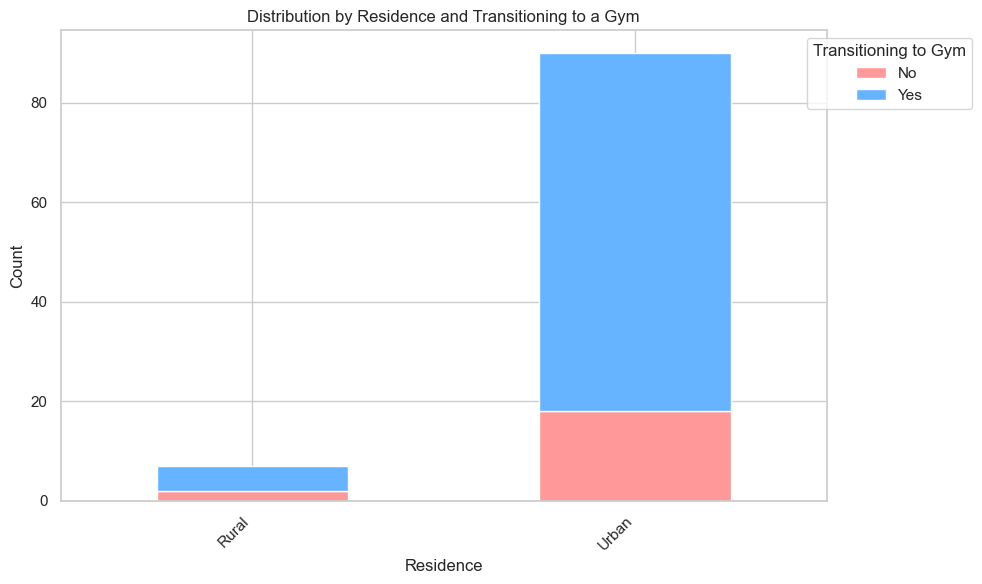

In [89]:
# Group the data by 'Residence' and 'Transitioning to a Gym'
# and count the occurrences
grouped_data = data.groupby(['Residence', 'Transitioning to a Gym'])['Residence'].count().unstack().fillna(0)

# Create a stacked bar chart
colors = ['#ff9999', '#66b3ff']
ax = grouped_data.plot(kind='bar', stacked=True, color=colors, figsize=(10, 6))

plt.title('Distribution by Residence and Transitioning to a Gym')
plt.xlabel('Residence')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')

# Add a legend
ax.legend(title='Transitioning to Gym', loc='upper right', bbox_to_anchor=(1.2, 1))

plt.tight_layout()
plt.show()

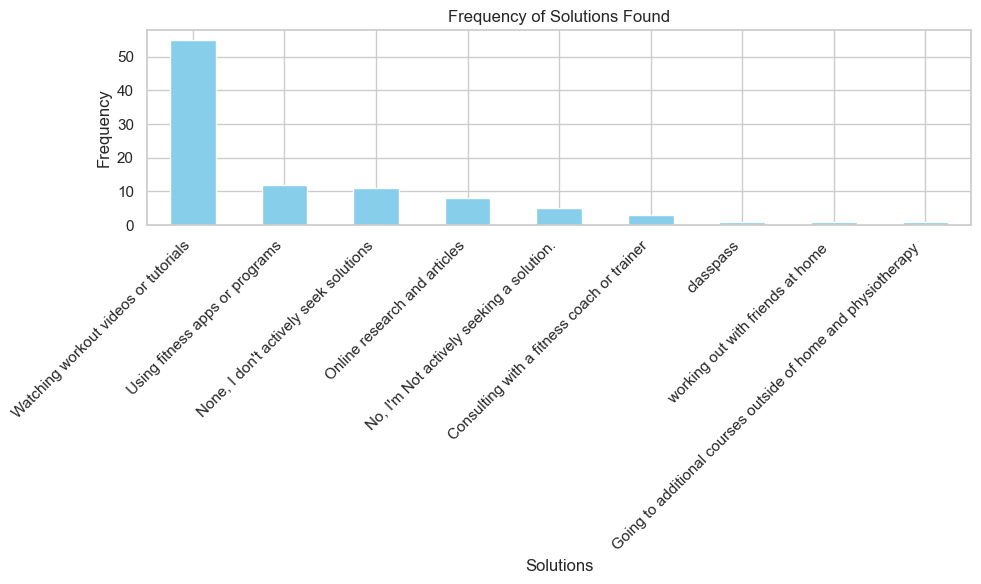

In [90]:


data = pd.read_csv('/Users/student/Desktop/Case Study/CSV File for Home Workout - Form Yanıtları 1.csv', delimiter=',')

# Count the frequency of each solution
solution_counts = data['Solutions Found'].value_counts()

# Create a bar plot
plt.figure(figsize=(10, 6))
solution_counts.plot(kind='bar', color='skyblue')
plt.title('Frequency of Solutions Found')
plt.xlabel('Solutions')
plt.ylabel('Frequency')

# Rotate x-axis labels for better readability if needed
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()


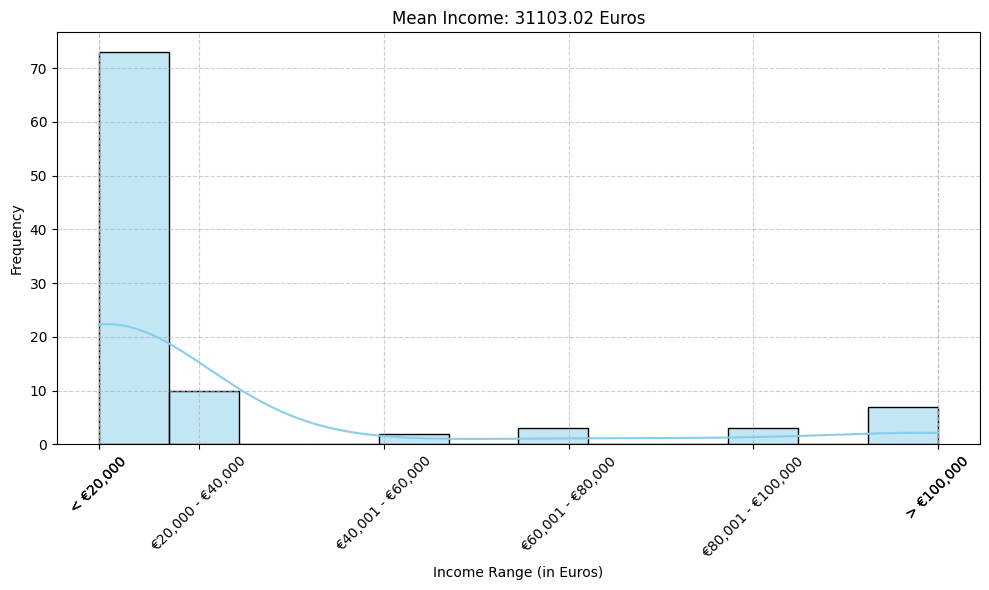

In [13]:
# Your code to convert income ranges to numerical values
approximate_income = data['Approximate Annual Income Range in Euros (€)']
values = []

# Map income ranges to numerical values
income_mapping = {
    "€40,001 - €60,000": 50000,
    "€20,000 - €40,000": 30000,
    "Under €20,000": 19152,
    "€80,001 - €100,000": 90000,
    "Over €100,000": 110000,
    "€60,001 - €80,000": 70000,
}

# Convert income ranges to numerical values
for i in approximate_income:
    if i in income_mapping:
        values.append(income_mapping[i])
    elif "Under" in i:  # Change labels
        values.append(19152)
    elif "Over" in i:  # Change labels
        values.append(110000)
    else:
        values.append(100000)  # A default value if not found

# Calculate the mean income
mean_income = sum(values) / len(values)

# Create a histogram with Seaborn and the mean income as the title
plt.figure(figsize=(10, 6))
sns.histplot(values, bins=12, kde=True, color='skyblue')
plt.title(f'Mean Income: {mean_income:.2f} Euros')
plt.xlabel('Income Range (in Euros)')
plt.ylabel('Frequency')

# Modify x-axis labels
tick_values = list(income_mapping.values()) + [19152, 110000]
tick_labels = list(income_mapping.keys()) + ['< €20,000', '> €100,000']
plt.xticks(tick_values, tick_labels, rotation=45)

# Show the plot
plt.tight_layout()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

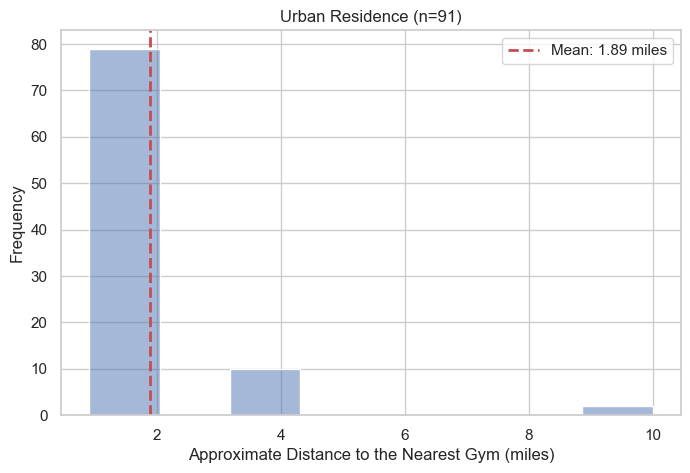

In [28]:
# Load the data
data = pd.read_csv("/Users/student/Desktop/Case Study/CSV File for Home Workout - Form Yanıtları 1.csv")

# Replace "I don't know" with NaN for clear analysis
data['Approximate Distance to the Nearest Gym'] = data['Approximate Distance to the Nearest Gym'].replace("I don't kNow", None)

# Create a subplot
fig, ax = plt.subplots(figsize=(8, 5))

# Plot for Urban residence
urban_data = data[data['Residence'] == 'Urban']
urban_proximity = urban_data['Approximate Distance to the Nearest Gym'].str.extract(r'([\d\.]+)').astype(float)
urban_proximity = urban_proximity.fillna(0)
urban_proximity = urban_proximity.replace({0: 0.9, 1: 1.5, 2: 3.5, 5: 8.0})
sns.histplot(data=urban_proximity, bins="auto", stat="count", ax=ax)
ax.set_title(f"Urban Residence (n={len(urban_data)})")
ax.set_xlabel("Approximate Distance to the Nearest Gym (miles)")
ax.set_ylabel("Frequency")

# Calculate the mean
urban_mean = urban_proximity.mean().values[0]
ax.axvline(urban_mean, color='r', linestyle='dashed', linewidth=2, label=f"Mean: {urban_mean:.2f} miles")
ax.legend()

plt.show()

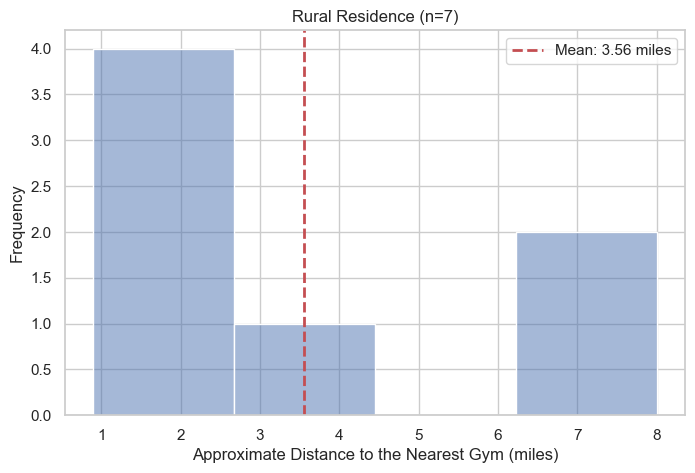

In [29]:
# Create a subplot
fig, ax = plt.subplots(figsize=(8, 5))

# Plot for Rural residence
rural_data = data[data['Residence'] == 'Rural']
rural_proximity = rural_data['Approximate Distance to the Nearest Gym'].str.extract(r'([\d\.]+)').astype(float)
rural_proximity = rural_proximity.fillna(0)
rural_proximity = rural_proximity.replace({0: 0.9, 1: 1.5, 2: 3.5, 5: 8.0})
sns.histplot(data=rural_proximity, bins="auto", stat="count", ax=ax)
ax.set_title(f"Rural Residence (n={len(rural_data)})")
ax.set_xlabel("Approximate Distance to the Nearest Gym (miles)")
ax.set_ylabel("Frequency")

# Calculate the mean
rural_mean = rural_proximity.mean().values[0]
ax.axvline(rural_mean, color='r', linestyle='dashed', linewidth=2, label=f"Mean: {rural_mean:.2f} miles")
ax.legend()

plt.show()

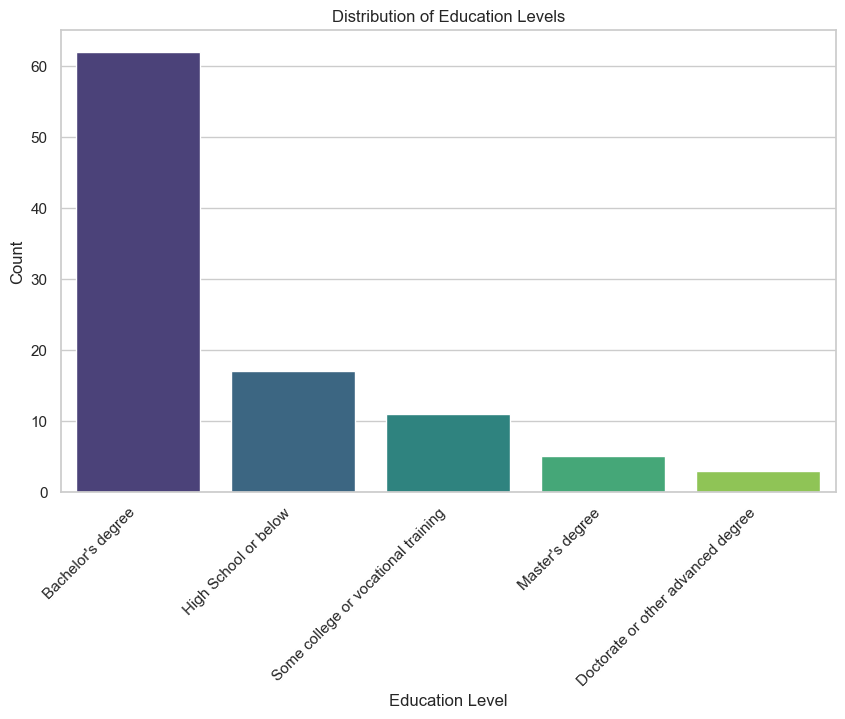

In [30]:
# Count the frequency of each education level
education_counts = data['Level of Education'].value_counts()

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
ax = sns.barplot(x=education_counts.index, y=education_counts.values, palette="viridis")
ax.set(xlabel="Education Level", ylabel="Count")
ax.set_title("Distribution of Education Levels")
plt.xticks(rotation=45, ha="right")

plt.show()

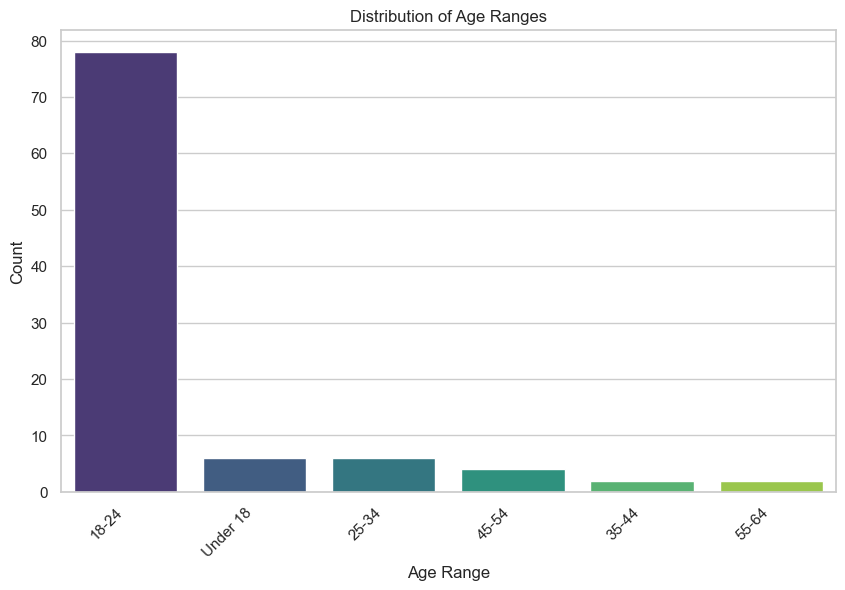

In [31]:
# Count the frequency of each age range
age_counts = data['Age Range'].value_counts()

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
ax = sns.barplot(x=age_counts.index, y=age_counts.values, palette="viridis")
ax.set(xlabel="Age Range", ylabel="Count")
ax.set_title("Distribution of Age Ranges")
plt.xticks(rotation=45, ha="right")

plt.show()

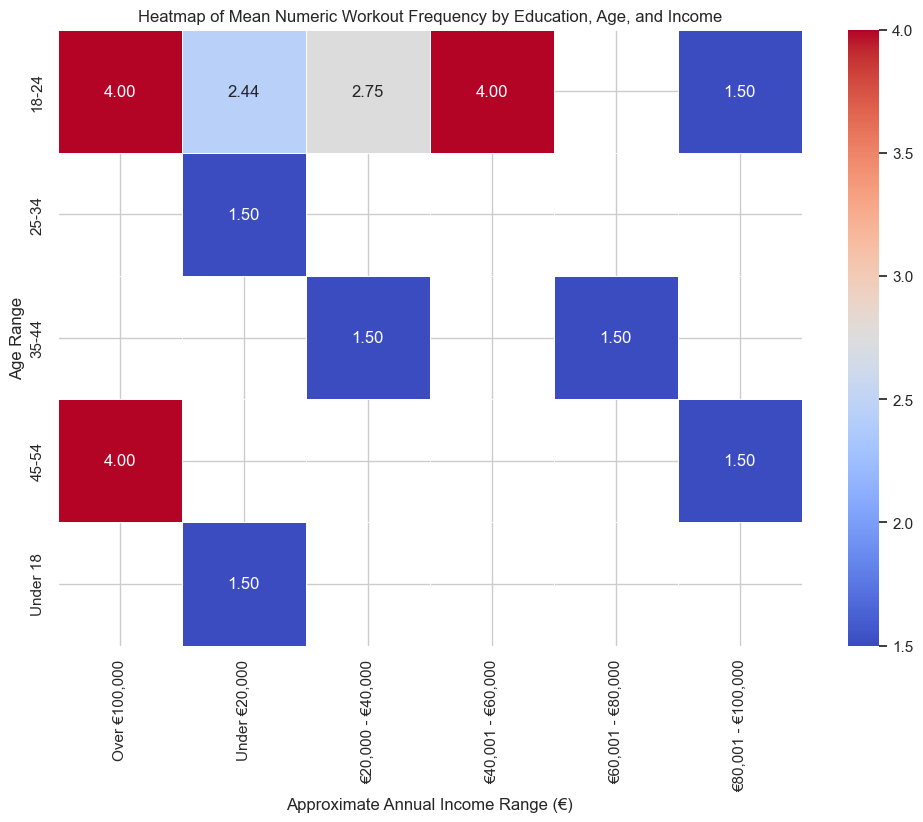

In [45]:
# Approximations for workout frequency
approximations = {
    "Daily": 7,
    "3-5 times per week": 4,
    "1-2 times per week": 1.5,
    "Less than once a week": 0.5,
}

# Apply the approximations to the dataset
data["Numeric Workout Frequency"] = data["Frequency of Workouts at Home"].map(approximations)

# Calculate the mean workout frequency for each combination
means = data.groupby(["Level of Education", "Age Range", "Approximate Annual Income Range in Euros (€)"])["Numeric Workout Frequency"].mean().reset_index()

# Create a pivot table for the heatmap
pivot_table = means.pivot_table(index="Age Range", columns="Approximate Annual Income Range in Euros (€)", values="Numeric Workout Frequency")

# Set the figure size
plt.figure(figsize=(12, 8))

# Create a heatmap
sns.heatmap(pivot_table, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, linewidths=0.5)

# Add labels and title
plt.xlabel("Approximate Annual Income Range (€)")
plt.ylabel("Age Range")
plt.title("Heatmap of Mean Numeric Workout Frequency by Education, Age, and Income")

# Display the heatmap
plt.show()

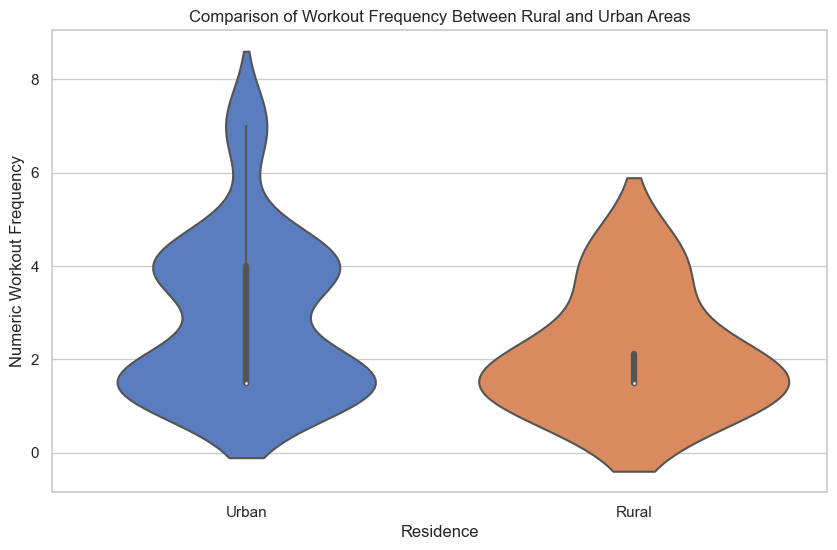

In [46]:
# Set the figure size
plt.figure(figsize=(10, 6))

# Create a violin plot to compare workout frequency between rural and urban areas
sns.violinplot(x="Residence", y="Numeric Workout Frequency", data=data, palette="muted")

# Add labels and title
plt.xlabel("Residence")
plt.ylabel("Numeric Workout Frequency")
plt.title("Comparison of Workout Frequency Between Rural and Urban Areas")

# Display the violin plot
plt.show()

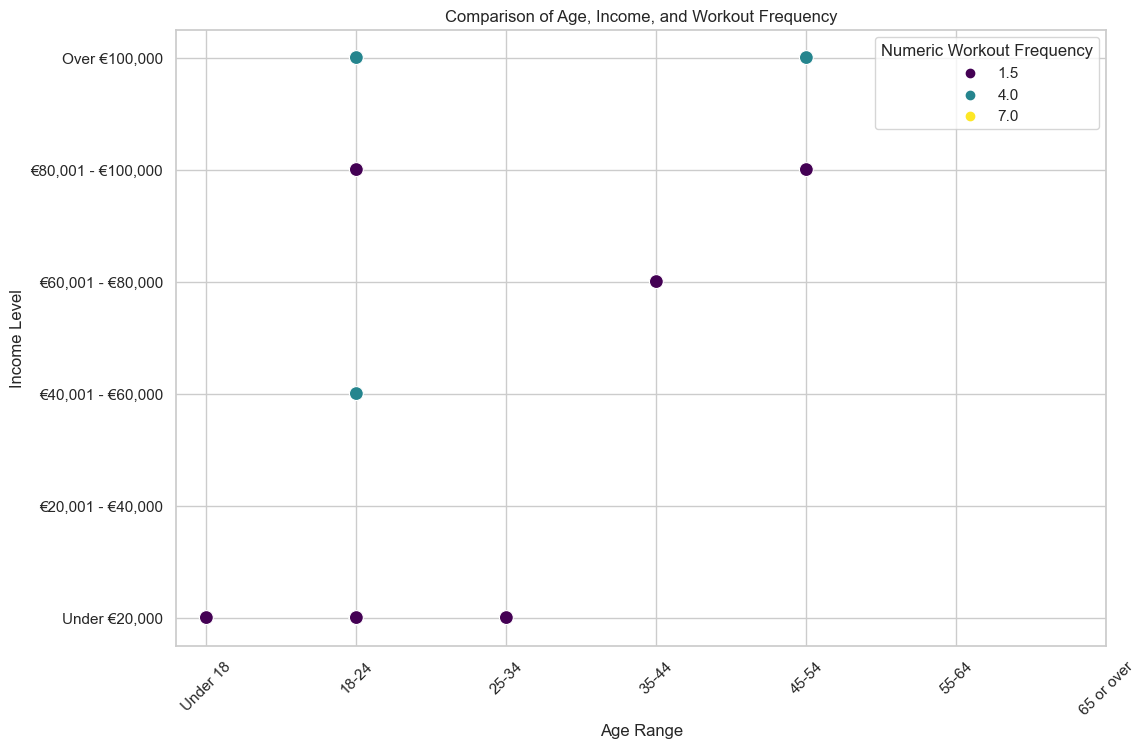

In [52]:
# Create a dictionary to map income categories to numerical values
income_mapping = {
    "Under €20,000": 1,
    "€20,001 - €40,000": 2,
    "€40,001 - €60,000": 3,
    "€60,001 - €80,000": 4,
    "€80,001 - €100,000": 5,
    "Over €100,000": 6,
}

# Define the desired order for age ranges and create a numerical mapping
age_order = ["Under 18", "18-24", "25-34", "35-44", "45-54", "55-64", "65 or over"]
age_mapping = {age: i + 1 for i, age in enumerate(age_order)}

# Apply the mappings to the data
data["Income Level"] = data["Approximate Annual Income Range in Euros (€)"].map(income_mapping)
data["Age Order"] = data["Age Range"].map(age_mapping)

# Add a new category for "0.5 Workout Frequency"
data.loc[data["Frequency of Workouts at Home"] == "0.5 times per week", "Numeric Workout Frequency"] = 0.5

# Set the figure size
plt.figure(figsize=(12, 8))

# Create a scatter plot to compare age, coded income, and workout frequency
sns.scatterplot(
    x="Age Order",
    y="Income Level",
    hue="Numeric Workout Frequency",
    data=data,
    palette="viridis",
    s=100,
)

# Customize the legend
plt.legend(title="Numeric Workout Frequency", title_fontsize="12")

# Add labels and title
plt.xlabel("Age Range")
plt.ylabel("Income Level")
plt.title("Comparison of Age, Income, and Workout Frequency")

# Customize the y-axis ticks to show the original income categories
plt.yticks(list(income_mapping.values()), income_mapping.keys())
# Customize the x-axis ticks to show the ordered age ranges
plt.xticks(list(age_mapping.values()), age_order, rotation=45)

# Display the scatter plot
plt.show()